# What is Web Scrapping?


In a simple terminology, it is the process of extracting information from a web page by taking advantage of patterns in the web page's underlying code. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. There are different ways to scrape websites such as online Services, APIs or writing your own code.

The Internet hosts perhaps the greatest source of information — and misinformation — on the planet. Many disciplines, such as data science, business intelligence, and investigative reporting, can benefit enormously from collecting and analyzing data from websites.


# My choice for Web Scrapping is Python. Why?

Most of us are already aware how awesome Python is. But, so are other languages too. Then why did I personally choose Python over other languages for web scraping?
Here are some of the features which makes process more easy/suitable for web scrapping.

* Python is ease of use
* Python has vast collection of libraries
* Python is dynamic language
* Python has small code for large task

And Python community has come up with some pretty powerful web scraping tools.

# Project Introduction

The idea of this project is to collect the data from multiple pages for product "Laptops" from the website called "Flipkart". Flipkart is India's leading e-commerce with over 80 million products across 80 + categories.

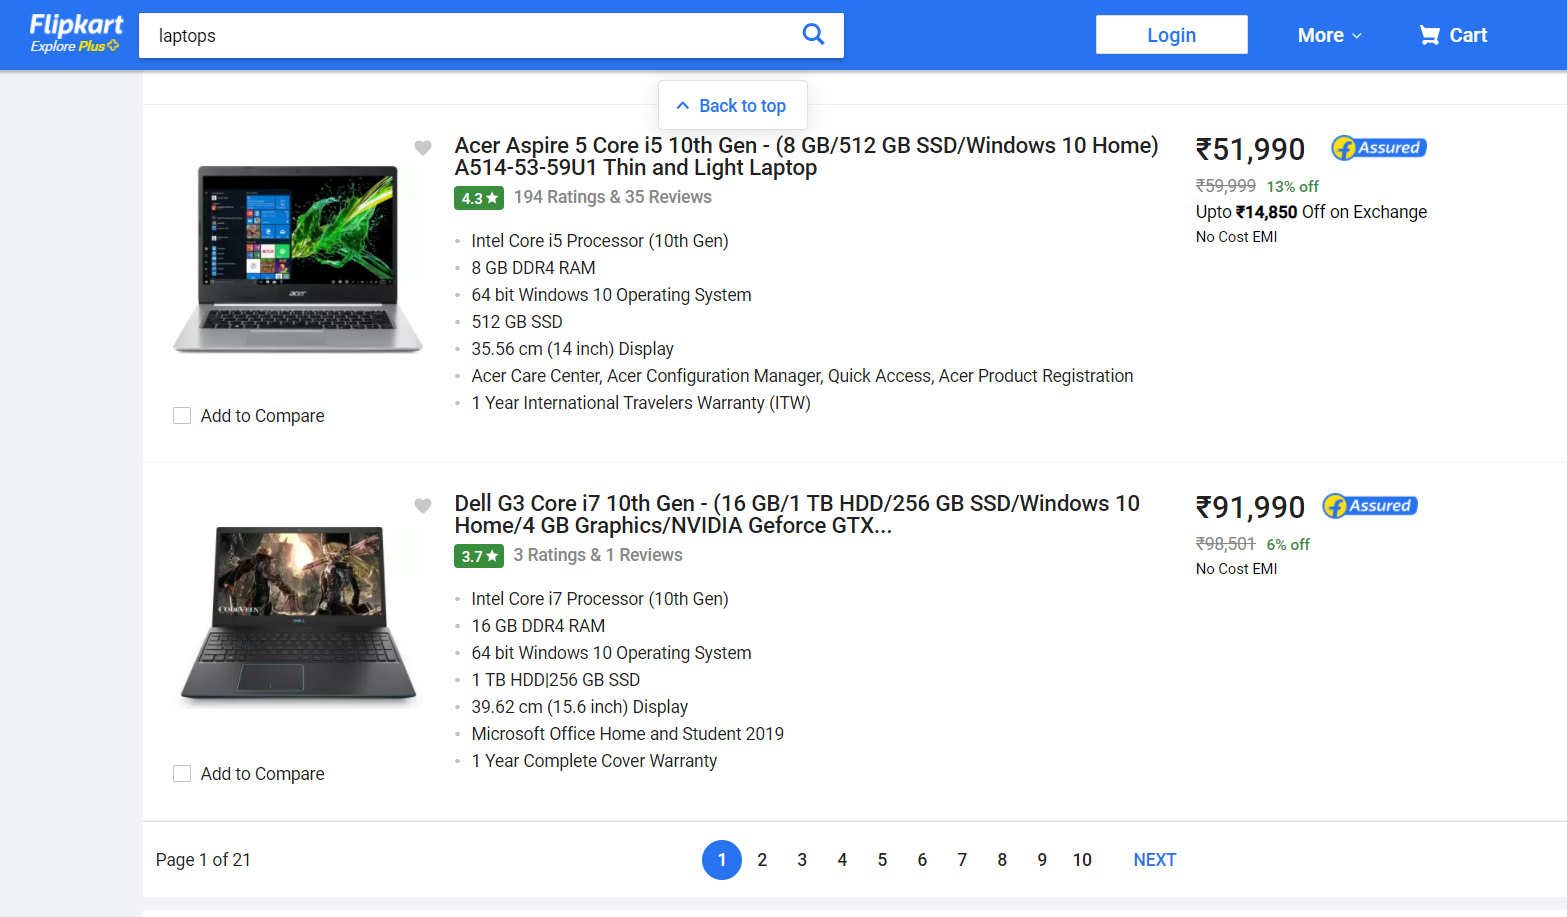


# Goal

As per our observation we have total 21 web pages where we have the details about laptops. So our goal is to scrape all these web pages and collect the information about laptops from it which we can use for further analysis.


# Libraries used for Web Scrapping

As we know, Python is used for various applications and there are different libraries for different purposes. In our further demonstration, we will be using the following libraries:


In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

#  Run the code and extract data 
We'll first create a list of objects to store their respective content and then we extract the data from the website

In [3]:
#Here is a list of the data which we want from the website
descriptions = []
processors = []
ram = []
os = []
storage = []
inches = []
warranty = []
prices = []
ratings = []
exchange_off = []

# Its time for Action

In [4]:
pages = list(range(1,22))
for page in pages:
#     print(page)
    response = requests.get("https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}".format(page)).text #URL which want to scrape
    #content = response.content #To get the content
    soup = BeautifulSoup(response, 'html.parser')
    #print(soup.prettify())
    
    """ Now the below simple logic code helps us to scrape the data for each containers which we want from the all pages"""
    
    desc = soup.find_all('div', class_ = '_3wU53n') # Extracting descriptions of each laptop 
    for i in range(len(desc)):
        descriptions.append(desc[i].text)

    
    commonclass = soup.find_all('li', class_ = 'tVe95H') #This class is applicable for all the features which are written below
    for i in range(0,len(commonclass)):
        p = commonclass[i].text #extracting the text from tags
        if('Core' in p):
            processors.append(p)
        #print(processors)
        elif('RAM' in p):
            ram.append(p)
        #print(ram)
        elif('Operating' in p):
            os.append(p)
        #print(os)
        elif('HDD' in p or 'SSD' in p):
            storage.append(p)
       # print(storage)
        elif('Display' in p):
            inches.append(p)
        #print(inches)
        elif('Warranty' in p):
            warranty.append(p)
        #print(warranty)
  
    price = soup.find_all('div',class_ = '_1vC4OE _2rQ-NK') # Extracting price of each laptop
    for p in price:
        prices.append(p.text)
 

    rating = soup.find_all('div',class_ = 'hGSR34') # Extracting rating of each laptop
    for r in rating:
        ratings.append(r.text)


    exchange = soup.find_all('div',class_ = '_3_G5Wj') # Extracting exchange offer for each laptop
    for e in exchange:
        exchange_off.append(e.text)
   

* So, what we have done above is,  we have captured the desc and conveted to text and then we appeneded to our descriptions container.  Now we can apply the same logic to the other list objects.
* We observe that the classnames for the different specifications are under one div.So we have written conditional statements and applied same method to extract the different features.
* Likewise, we have followed the same technique and extracted the information for price, rating & exchange.
* Next, we'll print the length of each list objects

In [5]:
print(len(descriptions))
print(len(processors))
print(len(ram))
print(len(os))
print(len(storage))
print(len(inches))
print(len(warranty))
print(len(prices))
print(len(ratings))
print(len(exchange_off))

504
504
506
527
508
538
486
504
640
1078


* If we observe the length of all the containers we have difference in numbers. This is because due to missing of tags on dynamic web pages, so the missing data won't append to its respective         containers. Hence, it is indeed that there would be deviation in our lengths for list containers.

* To convert this to dataframe we need to consider minumum number length i,e. (485) and pass that to dataframe object. Below we have performed the same operation

In [6]:
df = {'Description':descriptions[486],'Processor':processors[486],'RAM':ram[486],'Operating System':os[slice(486)],'Storage':storage[slice(486)],'Display':inches[slice(486)],'Warranty':warranty[slice(486)],
      'Price':prices[slice(486)]}
dataset = pd.DataFrame(data = df) # Finally merging all the features into a single dataframe

In [7]:
dataset

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price
0,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),"₹1,24,990"
1,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Limited International Hardware Warranty,"₹74,910"
2,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,"Asus Splendid, ATK Package (Asus on Screen Dis...",1 Year Limited International Hardware Warranty,"₹42,990"
3,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year International Travelers Warranty (ITW),"₹24,990"
4,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹30,211"
...,...,...,...,...,...,...,...,...
481,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,Pre-installed Genuine Windows 10 Operating Sys...,1 TB HDD|256 GB SSD,Full HD LED Backlit Anti-glare Wideview Displa...,1 Year Onsite Warranty,"₹47,500"
482,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Brand Warranty,"₹95,000"
483,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,Pre-installed Genuine Windows 10 Operating Sys...,1 TB HDD,Full HD LED Backlit Display for Better Visual ...,1 Year Onsite Warranty,"₹1,24,990"
484,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,500 GB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹61,745"


* Yayyy!! So the above one is the dataset which we have scrapped from the website and we can use this for our further analysis.

* Next, if want to convert this to 'CSV' we simply pass the Pandas csv function and convert the dataset to CSV file which can be seen below.

In [8]:
dataset.to_csv('Laptops.csv') #This will create a csv file and save on my machine

In [9]:
df = pd.read_csv('Laptops.csv') # Crosschecking our csv file
df.shape

(486, 9)

What if we want to save the above dataframe to SQLtable or database. Is it possible? Offcourse, it is possible we can create it. I am considering SQLite database which is a very flexible DBMS and will show you the process accordingly. 

# Saving the dataframe to database
We are going to use SQLAlchemy to create a connection to a new SQLite database, which in this example will be stored in file named Laptops_pandas.db. Start by importing the create_engine function from the sqlalchemy library.

In [32]:
from sqlalchemy import create_engine

Create the connection using the imported create_engine function and then invoking the connect method on it.We set echo=True to see all of the output that comes from our database connection. When the connection is successful you will see output similar to the following:

In [33]:
engine = create_engine('sqlite:///Laptops_pandas.db', echo=True)
sqlite_connection = engine.connect()

2020-09-30 18:03:05,197 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-30 18:03:05,198 INFO sqlalchemy.engine.base.Engine ()
2020-09-30 18:03:05,200 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-30 18:03:05,201 INFO sqlalchemy.engine.base.Engine ()


We set a variable name with the string of a table name you would like to create. Then use that variable when invoking the to_sql method on the df object, which is our pandas DataFrame. Once we execute the below code the echo output should spin up with a bunch of output.

In [17]:
sqlite_table = "Laptops"
df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-09-30 17:48:02,715 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Laptops")
2020-09-30 17:48:02,721 INFO sqlalchemy.engine.base.Engine ()
2020-09-30 17:48:02,722 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Laptops")
2020-09-30 17:48:02,723 INFO sqlalchemy.engine.base.Engine ()
2020-09-30 17:48:02,726 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Laptops" (
	"index" BIGINT, 
	"Unnamed: 0" BIGINT, 
	"Description" TEXT, 
	"Processor" TEXT, 
	"RAM" TEXT, 
	"Operating System" TEXT, 
	"Storage" TEXT, 
	"Display" TEXT, 
	"Warranty" TEXT, 
	"Price" TEXT
)


2020-09-30 17:48:02,727 INFO sqlalchemy.engine.base.Engine ()
2020-09-30 17:48:02,734 INFO sqlalchemy.engine.base.Engine COMMIT
2020-09-30 17:48:02,734 INFO sqlalchemy.engine.base.Engine CREATE INDEX "ix_Laptops_index" ON "Laptops" ("index")
2020-09-30 17:48:02,736 INFO sqlalchemy.engine.base.Engine ()
2020-09-30 17:48:02,742 INFO sqlalchemy.engine.base.Engine COMMIT
2020-09-30 17:48:02,746 INFO sqlalchem

In [34]:
%%capture
%load_ext sql
%sql sqlite:///Laptops_pandas.db

Now we have set up the environment and let's take a look into the tables inside the database

In [56]:
%%sql
SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///Laptops_pandas.db
Done.


type,name,tbl_name,rootpage,sql
table,Laptops,Laptops,37,"CREATE TABLE ""Laptops"" ( ""index"" BIGINT, ""DELE"" BIGINT, ""Description"" TEXT, ""Processor"" TEXT, ""RAM"" TEXT, ""Operating System"" TEXT, ""Storage"" TEXT, ""Display"" TEXT, ""Warranty"" TEXT, ""Price"" TEXT)"


 The database has only one table called "Laptops" which we can use our further analysis. Now let's quickly check the first 5 rows!

In [57]:
%%sql
SELECT * FROM Laptops
LIMIT 5;

 * sqlite:///Laptops_pandas.db
Done.


index,DELE,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price
0,0,MarQ by Flipkart Falkon Aerbook Core i5 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) MAi5882SWT Thin an...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),"₹1,24,990"
1,1,MarQ by Flipkart Falkon Aerbook Core i5 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) MAi5882SWT Thin an...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Limited International Hardware Warranty,"₹74,910"
2,2,MarQ by Flipkart Falkon Aerbook Core i5 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) MAi5882SWT Thin an...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,"Asus Splendid, ATK Package (Asus on Screen Display), Asus Live Update, Microsoft Office Home and Student 2019",1 Year Limited International Hardware Warranty,"₹42,990"
3,3,MarQ by Flipkart Falkon Aerbook Core i5 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) MAi5882SWT Thin an...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year International Travelers Warranty (ITW),"₹24,990"
4,4,MarQ by Flipkart Falkon Aerbook Core i5 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) MAi5882SWT Thin an...,Intel Core i5 Processor (8th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹30,211"


# Conclusion

* Here are the few lines of code that we used to scrape the multiple pages from the website, extract the relevant data, convert it into a tabular dataset,and export it to a CSV file:
* We have also showcased the how the dataframe can be saved / created into database with SQLITE which can be used for further analysis project

# Web Scraping Advice

* Web scraping works best with static, well-structured web pages. Dynamic or interactive content on a web page is often not accessible through the HTML source, which makes scraping it much harder!
* Web scraping is a "fragile" approach for building a dataset. The HTML on a page you are scraping can change at any time, which may cause your scraper to stop working.
* If you can download the data you need from a website, or if the website provides an API with data access, those approaches are preferable to scraping since they are easier to implement and less     likely to break.
* If you are scraping a lot of pages from the same website (in rapid succession), it's best to insert delays in your code so that you don't overwhelm the website with requests. If the website         decides you are causing a problem, they can block your IP address (which may affect everyone in your building!)